In [1]:
import altair as alt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import nx_altair as nxa
import pandas as pd
import random
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")

In [8]:
def GetGraphMetrics(graph):
    
    graph_degree = dict(graph.degree)
    print("Graph Summary:")
    print(f"Number of nodes : {len(graph.nodes)}")
    print(f"Number of edges : {len(graph.edges)}")
    print(f"Maximum degree : {np.max(list(graph_degree.values()))}")
    print(f"Minimum degree : {np.min(list(graph_degree.values()))}")
    print(f"Average degree : {np.mean(list(graph_degree.values()))}")
    print(f"Median degree : {np.median(list(graph_degree.values()))}")
    print("")
    print("Graph Connectivity")
    try:
        print(f"Connected Components : {nx.number_connected_components(graph)}")
    except:
        print(f"Strongly Connected Components : {nx.number_strongly_connected_components(graph)}")
        print(f"Weakly Connected Components : {nx.number_weakly_connected_components(graph)}")
    print("")
    print("Graph Distance")
    try:
        print(f"Average Distance : {nx.average_shortest_path_length(graph)}")
        print(f"Diameter : {nx.algorithms.distance_measures.diameter(graph)}")
    except:
        try:
            shortest_lengths = []
            for C in nx.strongly_connected_components(graph):
                shortest_lengths.append(nx.average_shortest_path_length(G.subgraph(C)))
            print(f"Average Shortest Lengths of Strongly Connected Components : {np.mean(shortest_lengths)}")
        except:
            pass
    print("")
    print("Graph Clustering")
    print(f"Transitivity : {nx.transitivity(graph)}")
    print(f"Average Clustering Coefficient : {nx.average_clustering(graph)}")
    
    return None

In [15]:
players_playoffs = pd.read_csv('2019_Playoffs_Players.csv')

In [16]:
players_playoffs.shape

(8278, 50)

In [17]:
players_playoffs.head()

,GAME_ID,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,TEAM_ABBREVIATION,PASS_TYPE,G,PASS_TO,PASS_TEAMMATE_PLAYER_ID,...,AST_overall,STL_overall,BLK_overall,TO_overall,PF_overall,PTS_overall,PLUS_MINUS_overall,POSITION,mean,std
0,41900101,2594,"Korver, Kyle",Milwaukee Bucks,1.610613e+09,MIL,made,1.0,"Mason III, Frank",1628412.0,...,0.0,0.0,0.0,0.0,1.0,6.0,-6.0,Guard-Forward,0.074522,0.088212
1,41900101,2594,"Korver, Kyle",Milwaukee Bucks,1.610613e+09,MIL,made,1.0,"Antetokounmpo, Giannis",203507.0,...,0.0,0.0,0.0,0.0,1.0,6.0,-6.0,Guard-Forward,0.074522,0.088212
2,41900101,2594,"Korver, Kyle",Milwaukee Bucks,1.610613e+09,MIL,made,1.0,"Middleton, Khris",203114.0,...,0.0,0.0,0.0,0.0,1.0,6.0,-6.0,Guard-Forward,0.074522,0.088212
3,41900101,2594,"Korver, Kyle",Milwaukee Bucks,1.610613e+09,MIL,made,1.0,"Bledsoe, Eric",202339.0,...,0.0,0.0,0.0,0.0,1.0,6.0,-6.0,Guard-Forward,0.074522,0.088212
4,41900101,2594,"Korver, Kyle",Milwaukee Bucks,1.610613e+09,MIL,made,1.0,"Hill, George",201588.0,...,0.0,0.0,0.0,0.0,1.0,6.0,-6.0,Guard-Forward,0.074522,0.088212


In [18]:
players_playoffs.columns

Index(['GAME_ID', 'PLAYER_ID', 'PLAYER_NAME_LAST_FIRST', 'TEAM_NAME',
       'TEAM_ID', 'TEAM_ABBREVIATION', 'PASS_TYPE', 'G', 'PASS_TO',
       'PASS_TEAMMATE_PLAYER_ID', 'FREQUENCY', 'PASS', 'AST', 'FGM', 'FGA',
       'FG_PCT', 'FG2M', 'FG2A', 'FG2_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'TEAM_CITY_overall', 'PLAYER_NAME_overall', 'NICKNAME_overall',
       'START_POSITION_overall', 'COMMENT_overall', 'MIN_overall',
       'FGM_overall', 'FGA_overall', 'FG_PCT_overall', 'FG3M_overall',
       'FG3A_overall', 'FG3_PCT_overall', 'FTM_overall', 'FTA_overall',
       'FT_PCT_overall', 'OREB_overall', 'DREB_overall', 'REB_overall',
       'AST_overall', 'STL_overall', 'BLK_overall', 'TO_overall', 'PF_overall',
       'PTS_overall', 'PLUS_MINUS_overall', 'POSITION', 'mean', 'std'],
      dtype='object')

In [19]:
players_playoffs = players_playoffs[~players_playoffs['PLAYER_NAME_LAST_FIRST'].isna()]

team_color = {'Milwaukee Bucks': '#13EAC9', 'Orlando Magic': '#00008B', 'Toronto Raptors': '#800000',
              'Brooklyn Nets': '#000000', 'Philadelphia 76ers': '#DC143C', 'Boston Celtics': '#008000',
              'Miami Heat': '#E50000', 'Indiana Pacers': '#030764', 'Los Angeles Lakers': '#4B0082',
              'Portland Trail Blazers': '#8C000F', 'LA Clippers': '#0343DF', 'Dallas Mavericks': '#000080',
              'Denver Nuggets': '#01153E', 'Utah Jazz': '#030764', 'Oklahoma City Thunder': '#EF4026', 'Houston Rockets': '#FF0000'}

players_playoffs['TEAM_COLOR'] = np.where(players_playoffs['TEAM_NAME'].isna(), '#929591', players_playoffs['TEAM_NAME'])
players_playoffs['TEAM_COLOR'] = players_playoffs['TEAM_COLOR'].map(team_color)

power = PowerTransformer(method='yeo-johnson')
players_playoffs = players_playoffs[players_playoffs['FREQUENCY'] > 0]
players_playoffs['log_FREQUENCY'] = np.log(players_playoffs['FREQUENCY']+0j).to_numpy().real
players_playoffs['norm_log_FREQUENCY'] = power.fit_transform(players_playoffs['log_FREQUENCY'].values.reshape(-1,1))

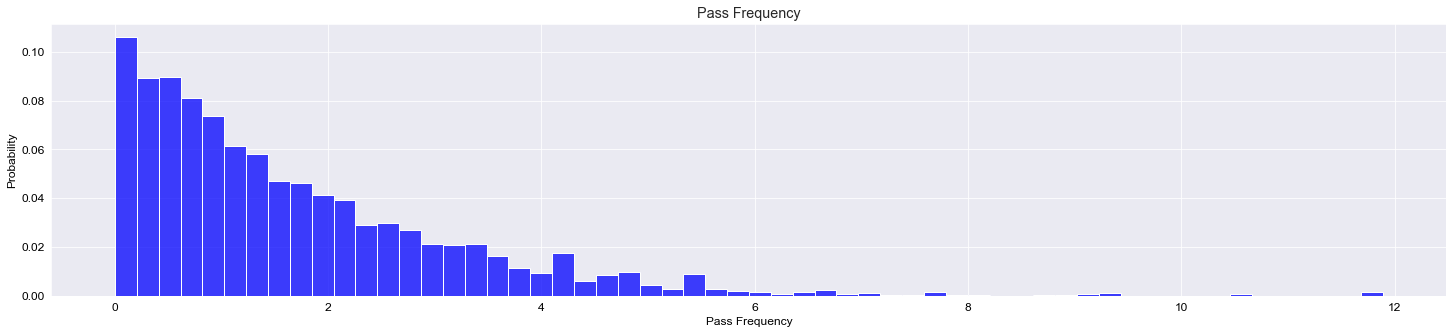

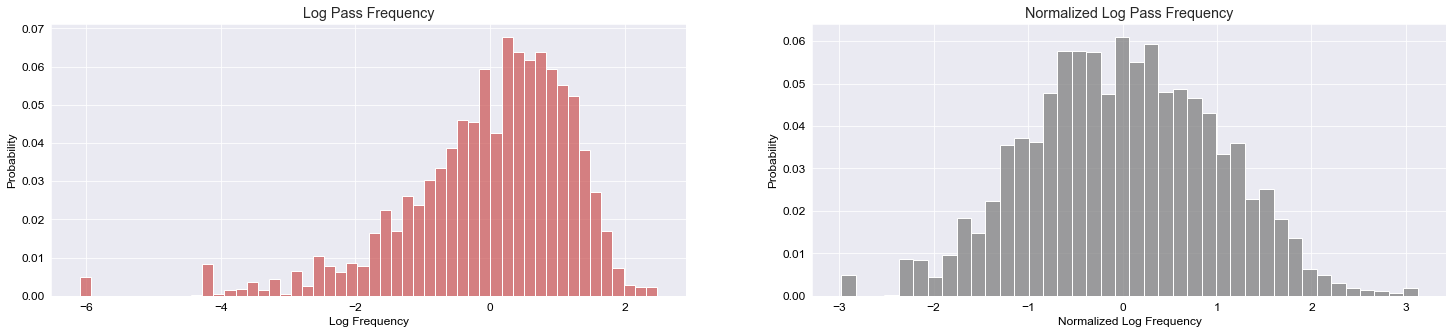

In [55]:
fig, ax = plt.subplots(figsize=(25,5))
plt.rcParams.update({'font.size': 12})

ax = sns.histplot(players_playoffs, x="FREQUENCY", stat='probability', color='blue')

ax.set(xlabel='Pass Frequency')
ax.set_title('Pass Frequency')
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25, 5))
plt.rcParams.update({'font.size': 12})


ax1 = sns.histplot(players_playoffs, x="log_FREQUENCY", stat='probability', color='indianred', ax=ax1)
ax2 = sns.histplot(players_playoffs, x="norm_log_FREQUENCY", stat='probability', color="gray", ax=ax2)

ax1.set(xlabel='Log Frequency')
ax1.set_title('Log Pass Frequency')
ax2.set(xlabel='Normalized Log Frequency')
ax2.set_title('Normalized Log Pass Frequency')
plt.subplots_adjust(hspace = 0.3)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

In [21]:
player_nodes_columns = ['FGM_overall', 'FGA_overall', 'FG_PCT_overall', 'FG3M_overall',
                        'FG3A_overall', 'FG3_PCT_overall', 'FTM_overall', 'FTA_overall',
                        'FT_PCT_overall', 'OREB_overall', 'DREB_overall', 'REB_overall',
                        'AST_overall', 'STL_overall', 'BLK_overall', 'TO_overall', 'PF_overall',
                        'PTS_overall', 'PLUS_MINUS_overall']

player_edges_attributes = ['FREQUENCY', 'log_FREQUENCY', 'norm_log_FREQUENCY', 
                           'AST', 'FG_PCT', 'FG2_PCT', 'FG3_PCT']

def ColorPlayersByTeam(player):
    
    if player in players_playoffs['FROM']:
        
        player_team_colors = dict(zip(players_playoffs.FROM, players_playoffs.TEAM_COLOR))
        return player_team_colors[player]
    
    else:
        
        player_team_colors = dict(zip(players_playoffs.TO, players_playoffs.TEAM_COLOR))
        return player_team_colors[player]


def CreateCentralityMeasureDataFrame(sorted_centrality_players, centrality_name):
    df = pd.DataFrame(sorted_centrality_players, columns=['Player', centrality_name])
    return df

def MetricsForEachTeam(team_network):
    
    d = dict(team_network.degree)
    metrics_df = pd.DataFrame(index=list(d.keys()))
    
    degree_centrality_df = CreateCentralityMeasureDataFrame(sorted(nx.degree_centrality(team_network).items(), key=lambda x:x[1], reverse=True), 'Degree Centrality')
    closeness_centrality_df = CreateCentralityMeasureDataFrame(sorted(nx.closeness_centrality(team_network).items(), key=lambda x:x[1], reverse=True), 'Closeness Centrality')
    betweenness_centrality_df = CreateCentralityMeasureDataFrame(sorted(nx.betweenness_centrality(team_network).items(), key=lambda x:x[1], reverse=True), 'Betweenness Centrality')
    eigenvector_centrality_df = CreateCentralityMeasureDataFrame(sorted(nx.eigenvector_centrality(team_network).items(), key=lambda x:x[1], reverse=True), 'Eigenvector Centrality')
    load_centrality_df = CreateCentralityMeasureDataFrame(sorted(nx.load_centrality(team_network).items(), key=lambda x:x[1], reverse=True), 'Load Centrality')
    pagerank_df = CreateCentralityMeasureDataFrame(sorted(nx.pagerank(team_network).items(), key=lambda x:x[1], reverse=True), 'PageRank')
    hub, auth = nx.hits(team_network)
    hubs_df = CreateCentralityMeasureDataFrame(sorted(hub.items(), key=lambda x:x[1], reverse=True), 'Hubs')
    authorities_df = CreateCentralityMeasureDataFrame(sorted(auth.items(), key=lambda x:x[1], reverse=True), 'Authorities')

    for metric in [degree_centrality_df, closeness_centrality_df, betweenness_centrality_df, eigenvector_centrality_df, load_centrality_df, pagerank_df, hubs_df, authorities_df]:
        metric = metric.set_index('Player')
        metrics_df = metrics_df.join(metric)
        
    metrics_df2 = pd.DataFrame(index=list(d.keys()))
    betweenness_centrality_df = betweenness_centrality_df[betweenness_centrality_df['Betweenness Centrality'] > 0]
    power = PowerTransformer(method='yeo-johnson')
    betweenness_centrality_df['Log Betweenness Centrality'] = np.log(betweenness_centrality_df['Betweenness Centrality']+0j).to_numpy().real
    betweenness_centrality_df['Flow Centrality'] = power.fit_transform(betweenness_centrality_df['Log Betweenness Centrality'].values.reshape(-1,1))
    
    ha_df = hubs_df.set_index('Player').join(authorities_df.set_index('Player'))
    ha_df['Hubs_Auth'] = ha_df['Hubs'] * ha_df['Authorities']
    ha_df = ha_df[ha_df['Hubs_Auth'] > 0]
    power = PowerTransformer(method='yeo-johnson')
    ha_df['Flow Dominance'] = power.fit_transform(ha_df['Hubs_Auth'].values.reshape(-1,1))
    metrics_df2 = metrics_df2.join(betweenness_centrality_df.set_index('Player'), how='left')
    metrics_df2 = metrics_df2.join(ha_df, how='left')
    
    metrics_df = metrics_df.join(metrics_df2.drop(columns=['Betweenness Centrality', 'Log Betweenness Centrality', 'Hubs', 'Authorities', 'Hubs_Auth']), how='left')
    
    return metrics_df

def CentralityMetricsByTeams(game_players):
    
    team_1, team_2 = game_players['TEAM_NAME'].unique()[0], game_players['TEAM_NAME'].unique()[1]
    
    team_1_network = game_players[game_players['TEAM_NAME']==team_1]
    G_player_team1 = nx.from_pandas_edgelist(team_1_network, 'FROM', 'TO', create_using=nx.DiGraph())
    team1_metrics = MetricsForEachTeam(G_player_team1)
    
    team_2_network = game_players[game_players['TEAM_NAME']==team_2]
    G_player_team2 = nx.from_pandas_edgelist(team_2_network, 'FROM', 'TO', create_using=nx.DiGraph())
    team2_metrics = MetricsForEachTeam(G_player_team2)
    
    player_node_metrics = team1_metrics.append(team2_metrics)
    
    return player_node_metrics

def CreateShotNodes(game_players):
    
    cols_drop = ['PASS_TYPE', 'PASS', 'SHOT_MADE', 'SHOT_MISS', 'TOTAL_SHOTS', 'FGM', 'FGA', 'FG2M', 'FG2A', 'FG3M', 'FG3A', 
                 'SHOT_MADE_FREQUENCY', 'SHOT_MISS_FREQUENCY', 'mean', 'std', 'START_POSITION_overall']
    game_players.loc[:, 'SHOT_MADE'] = (game_players['FGM'] + game_players['FG2M'] + game_players['FG3M']).astype(int)
    game_players.loc[:, 'SHOT_MISS'] = ((game_players['FGA'] - game_players['FGM']) + (game_players['FG2A'] - game_players['FG2M']) + (game_players['FG3A'] - game_players['FG3M'])).astype(int)
    game_players.loc[:, 'TOTAL_SHOTS'] = (game_players['SHOT_MADE'] + game_players['SHOT_MISS']).astype(int)
    game_players.loc[:, 'SHOT_MADE_FREQUENCY'] = round(game_players['SHOT_MADE']/game_players['TOTAL_SHOTS'], 3)
    game_players.loc[:, 'SHOT_MADE_FREQUENCY'] = game_players['SHOT_MADE_FREQUENCY'].fillna(0)
    game_players.loc[:, 'SHOT_MISS_FREQUENCY'] = 1-game_players['SHOT_MADE_FREQUENCY']

    shot_made = game_players[['TO', 'SHOT_MADE_FREQUENCY']].rename(columns={'TO':'FROM', 'SHOT_MADE_FREQUENCY':'FREQUENCY'})
    shot_made.loc[:, 'TO'] = 'SHOT_MADE'
    shot_miss = game_players[['TO', 'SHOT_MISS_FREQUENCY']].rename(columns={'TO':'FROM', 'SHOT_MISS_FREQUENCY':'FREQUENCY'})
    shot_miss.loc[:, 'TO'] = 'SHOT_MISS'

    shots = shot_made.append(shot_miss, sort=False)
    power = PowerTransformer(method='yeo-johnson')
    shots['log_FREQUENCY'] = np.log(shots['FREQUENCY']+1)
    shots['norm_log_FREQUENCY'] = power.fit_transform(shots['log_FREQUENCY'].values.reshape(-1,1))
    game_players = game_players.append(shots, sort=False)
    
    game_players = game_players.drop(columns=cols_drop)
    
    return game_players

def CreateGameNetwork(game_id):

    game_players = players_playoffs[players_playoffs['GAME_ID']==game_id].rename(columns={'PLAYER_NAME_LAST_FIRST':'FROM', 'PASS_TO':'TO'})
    game_players.loc[:, 'GAME_TITLE'] = f"{game_players['TEAM_NAME'].unique()[0]} vs {game_players['TEAM_NAME'].unique()[1]} ({season_playoffs[season_playoffs['GAME_ID']==game_id]['GAME_DATE_EST'].values[0]})"
    
    player_node_metrics = CentralityMetricsByTeams(game_players)
    game_players = CreateShotNodes(game_players)
    
    player_nodes_attributes_df = game_players.groupby(['PLAYER_ID'])[player_nodes_columns].mean()
    player_nodes_attributes_df = player_nodes_attributes_df.fillna(0)
    
    G_player = nx.from_pandas_edgelist(game_players, 'FROM', 'TO', player_edges_attributes, create_using=nx.DiGraph())
    player_node_attributes = player_nodes_attributes_df.to_dict('index')
    nx.set_node_attributes(G_player, player_node_attributes)
    
    return game_players, G_player, player_node_attributes, player_node_metrics

def GetNetworkDetails(graph, player_performance, team_players):
    
    team_performance = {k:v for k, v in player_performance.items() if (k in team_players) & (~np.isnan(v))}

    team_nodes = [k for k in team_performance.keys()]

    team_node_color = [v for k, v in team_performance.items()]

    team_node_size = [(v+1)*1000 for v in team_performance.values()]

    team_edges = [(u,v) for u, v in graph.edges() if u in team_players]

    team_edge_width = [graph[u][v]['norm_log_FREQUENCY']*1.15 for u, v in graph.edges() if u in team_players]
    
    return team_performance, team_nodes, team_node_color, team_node_size, team_edges, team_edge_width

def PlotNetwork(game_players_dataframe, graph, player_performance_metric):

    random.seed(0)
    
    player_nodes = [n for n in graph if (n != 'SHOT_MADE') & (n != 'SHOT_MISS')]
    shot_nodes = ['SHOT_MADE', 'SHOT_MISS']
    
    team1 = game_players_dataframe[~game_players_dataframe['TEAM_NAME'].isna()]['TEAM_NAME'].unique()[0]
    team1_players = game_players_dataframe[game_players_dataframe['TEAM_NAME']==team1]['FROM'].unique()
    team2 = game_players_dataframe[~game_players_dataframe['TEAM_NAME'].isna()]['TEAM_NAME'].unique()[1]
    team2_players = game_players_dataframe[game_players_dataframe['TEAM_NAME']==team2]['FROM'].unique()

    player_performance = nx.get_node_attributes(graph, player_performance_metric)
    all_performance = [v for v in player_performance.values() if ~(np.isnan(v))]
    team1_performance, team1_nodes, team1_node_color, team1_node_size, team1_edges, team1_edge_width = GetNetworkDetails(graph, player_performance, team1_players)
    team2_performance, team2_nodes, team2_node_color, team2_node_size, team2_edges, team2_edge_width = GetNetworkDetails(graph, player_performance, team2_players)
    all_nodes = [team1_nodes + team2_nodes + shot_nodes]
    edge_width = [graph[u][v]['norm_log_FREQUENCY']*1.15 for u, v in graph.edges()]
    
    df = pd.DataFrame(index=graph.nodes(), columns=graph.nodes())
    for row, data in nx.shortest_path_length(graph):
        for col, dist in data.items():
            df.loc[row,col] = dist

    df = df.fillna(df.max().max())
    
    plt.figure(figsize =(30, 18))
    pos = nx.kamada_kawai_layout(graph, dim=2, dist=df.to_dict())
    
    # nodes
    options = {
        "cmap": plt.cm.YlOrRd,
    }

    shot_options = {
        "node_size": 2000,
    }

    team1_n = nx.draw_networkx_nodes(graph, 
                                      pos, 
                                      nodelist=team1_nodes, 
                                      node_color=team1_node_color, 
                                      node_size=team1_node_size, 
                                      **options)
    team2_n = nx.draw_networkx_nodes(graph, 
                                      pos, 
                                      nodelist=team2_nodes, 
                                      node_color=team2_node_color, 
                                      node_size=team2_node_size, 
                                      **options)
    shot_n = nx.draw_networkx_nodes(graph, 
                                     pos, 
                                     nodelist=shot_nodes, 
                                     node_color='g', 
                                     node_size=2000)
    
    # edges
    edge_options = {
        "edge_cmap": plt.cm.BuPu,
        "arrowstyle": "->",
        "arrowsize": 10
    }
    
    e = nx.draw_networkx_edges(graph, 
                                pos, 
                                width=edge_width)

    team1_e = nx.draw_networkx_edges(graph,
                                      pos,
                                      edgelist=team1_edges,
                                      width=team1_edge_width,
                                      edge_color=team1_edge_width,
                                      **edge_options)

    team2_e = nx.draw_networkx_edges(graph,
                                      pos,
                                      edgelist=team2_edges,
                                      width=team2_edge_width,
                                      edge_color=team2_edge_width,
                                      **edge_options)
    
    nx.draw_networkx_labels(graph, pos, font_size=15)
    plt.axis('off')
    node_normalize = mcolors.Normalize(vmin=np.min(all_performance), vmax=np.max(all_performance))
    node_scalarmappaple = cm.ScalarMappable(norm=node_normalize, cmap=cm.YlOrRd)
    node_scalarmappaple.set_array(all_performance)
    plt.colorbar(node_scalarmappaple, label=player_performance_metric, fraction=0.05, pad=0.01)

    edge_normalize = mcolors.Normalize(vmin=np.min(edge_width), vmax=np.max(edge_width))
    edge_scalarmappaple = cm.ScalarMappable(norm=edge_normalize, cmap=cm.BuPu)
    edge_scalarmappaple.set_array(edge_width)
    plt.colorbar(edge_scalarmappaple, label="Normalized Log Frequency", fraction=0.05, pad=0.001)
    
    title = game_players_dataframe['GAME_TITLE'].values[0]
    plt.title(f'{title} - {player_performance_metric}', fontsize=15)
    plt.show()

In [22]:
game_networks = {}
for game_id in players_playoffs['GAME_ID'].unique():
    game_networks[game_id] = {'DataFrame': None, 'Network': None, 'Attributes': None, 'Metrics': None}
    game_players, G_player_game, player_node_attributes_game, player_node_metrics_game = CreateGameNetwork(game_id)
    game_networks[game_id]['DataFrame'] = game_players
    game_networks[game_id]['Network'] = G_player_game
    game_networks[game_id]['Attributes'] = player_node_attributes_game
    game_networks[game_id]['Metrics'] = player_node_metrics_game

In [23]:
def PlotAndGetNetworkForGame(game_id, flow_metric, plot=True, ret=True):

    df = game_networks[game_id]['DataFrame']
    network = game_networks[game_id]['Network']
    attributes = game_networks[game_id]['Attributes']
    metrics = game_networks[game_id]['Metrics']

    nx.set_node_attributes(network, metrics.to_dict('index'))
    
    if plot:
        PlotNetwork(df, network, flow_metric)
    
    if ret:
        return df, network, attributes, metrics

In [24]:
season_playoffs[(season_playoffs['HOME_TEAM']=='Los Angeles Lakers') & (season_playoffs['AWAY_TEAM']=='Miami Heat')]

,HOME_TEAM,HOME_TEAM_ID,AWAY_TEAM,VISITOR_TEAM_ID,GAME_ID,GAME_DATE_EST,FGM_home,FGA_home,FG3M_home,FG3A_home,...,STL_away,BLK_away,TO_away,PF_away,PTS_away,FG_PCT_away,FG3_PCT_away,FT_PCT_away,HOME_TEAM_WINS,COLOR
46,Los Angeles Lakers,1610612747,Miami Heat,1610612748,41900405,2020-10-09,38.0,82.0,14.0,38.0,...,7.0,3.0,13.0,19.0,111.0,0.314050,0.297872,0.488372,0,#FF796C
47,Los Angeles Lakers,1610612747,Miami Heat,1610612748,41900402,2020-10-02,49.0,97.0,16.0,47.0,...,2.0,1.0,9.0,23.0,114.0,0.336449,0.289474,0.476923,1,#029386
48,Los Angeles Lakers,1610612747,Miami Heat,1610612748,41900401,2020-09-30,38.0,84.0,15.0,38.0,...,4.0,5.0,8.0,15.0,98.0,0.299213,0.239130,0.440000,1,#029386


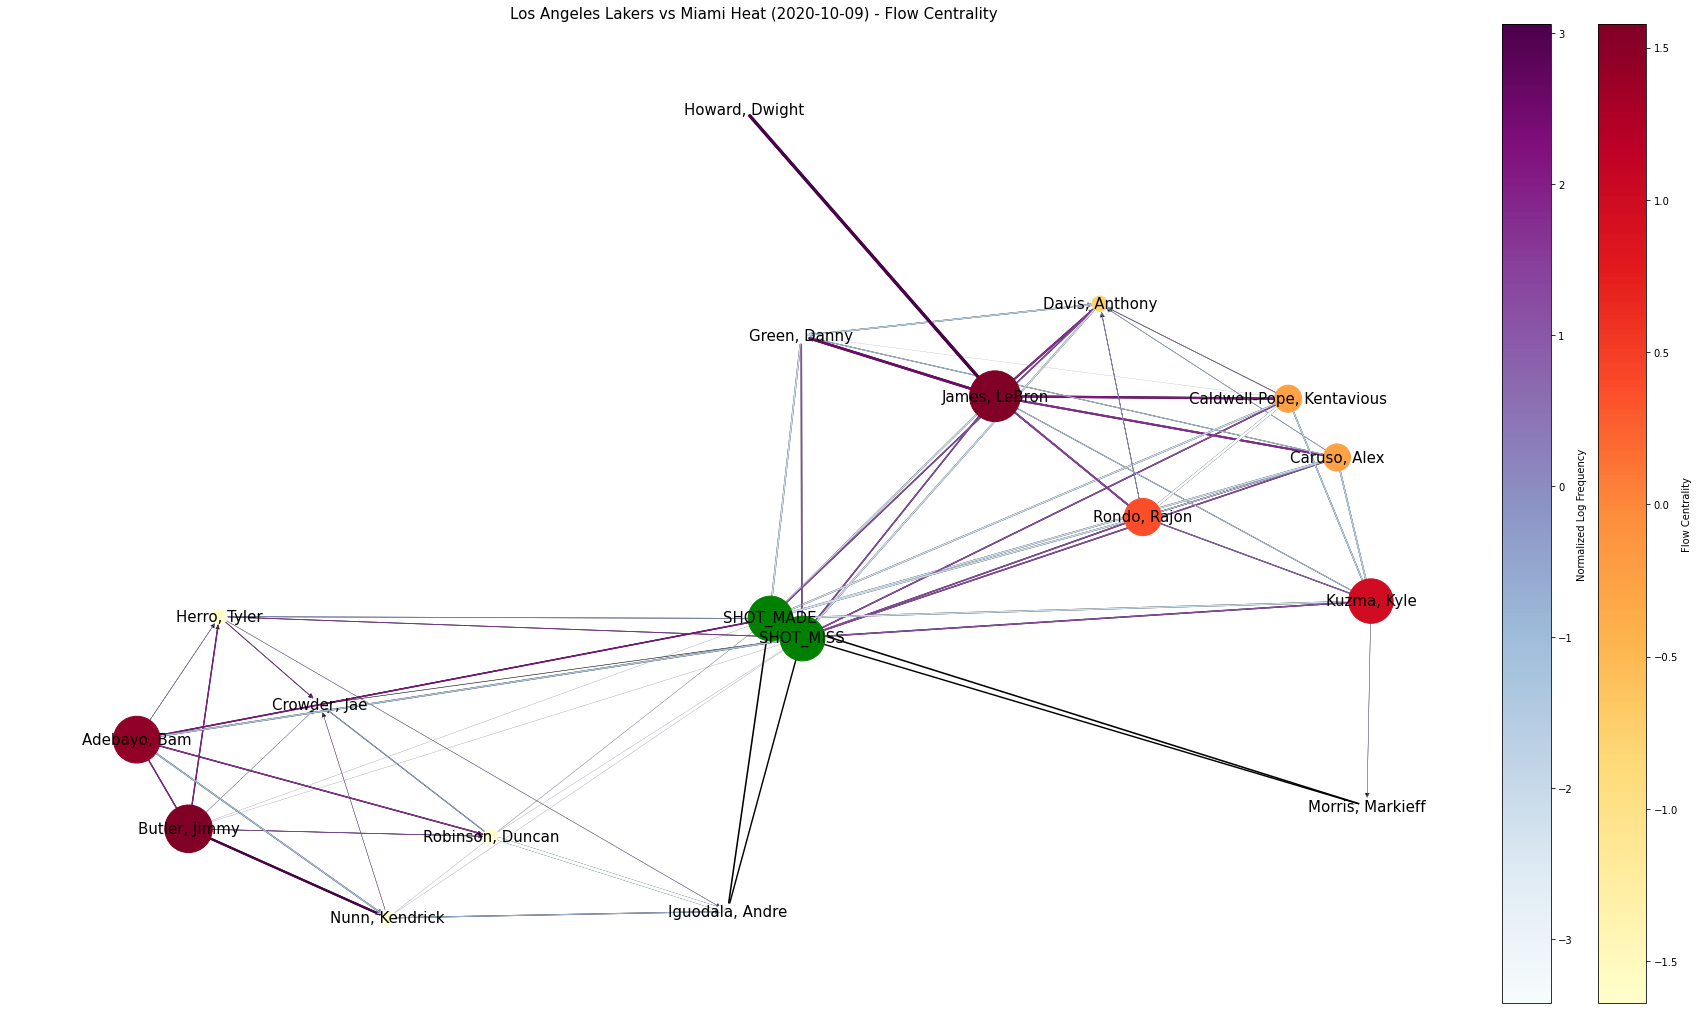

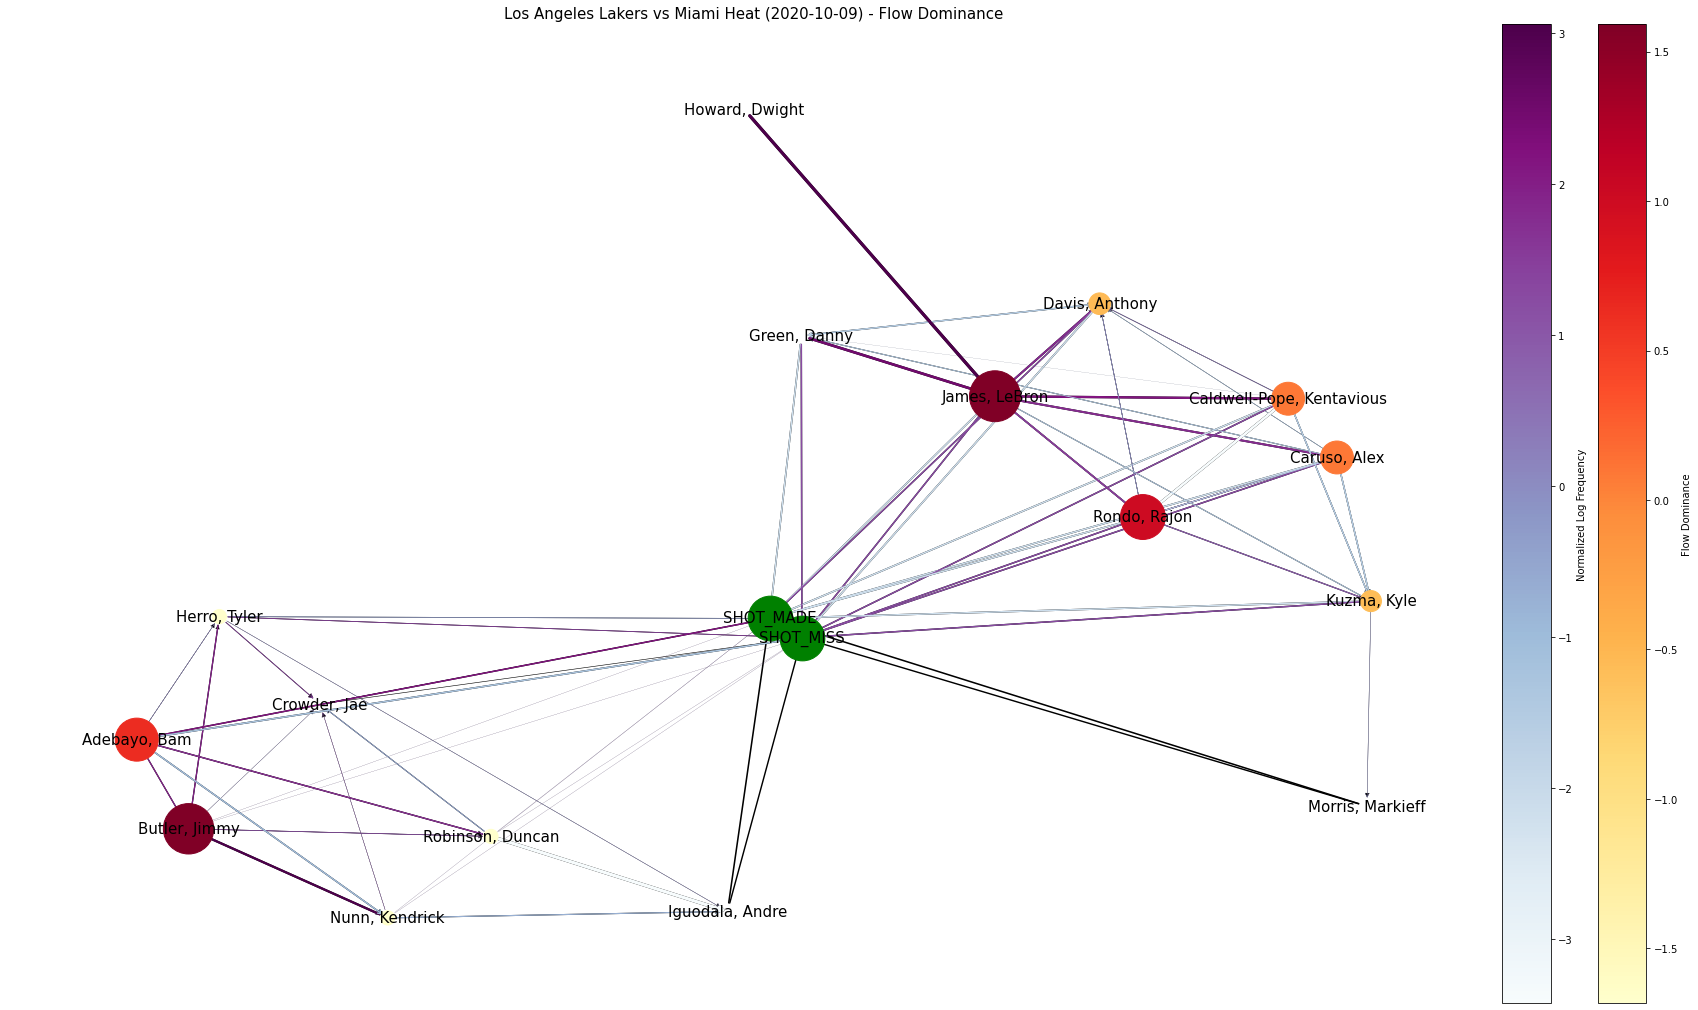

In [25]:
for lakers_miami_game in [41900405]:
    PlotAndGetNetworkForGame(lakers_miami_game, 'Flow Centrality', plot=True, ret=False)
    PlotAndGetNetworkForGame(lakers_miami_game, 'Flow Dominance', plot=True, ret=False)

In [26]:
lakers_miami_10_09_df, lakers_miami_10_09_network, lakers_miami_10_09_attribs, lakers_miami_10_09_metrics = PlotAndGetNetworkForGame(lakers_miami_game, 'Flow Centrality', plot=False, ret=True)
GetGraphMetrics(lakers_miami_10_09_network)

Graph Summary:
Number of nodes : 18
Number of edges : 82
Maximum degree : 15
Minimum degree : 1
Average degree : 9.11111111111111
Median degree : 10.0

Graph Connectivity
Strongly Connected Components : 8
Weakly Connected Components : 1

Graph Distance
Average Distance : 0.5294117647058824

Graph Clustering
Transitivity : 0.47277227722772275
Average Clustering Coefficient : 0.43494245763770245


In [66]:
centrality_metrics = {}
degree_frequencies = np.array([])
betweenness_centrality = np.array([])
load_centrality = np.array([])
flow_centrality = np.array([])
flow_dominance = np.array([])
for game in game_networks:
    centrality_metrics[game] = game_networks[game]['Metrics'].reset_index()
    
    degree_freq = game_networks[game]['Metrics']['Degree Centrality']
    degree_frequencies = np.append(degree_frequencies, degree_freq)
    
    between_cent = game_networks[game]['Metrics']['Betweenness Centrality']
    betweenness_centrality = np.append(betweenness_centrality, between_cent)
    
    load_cent = game_networks[game]['Metrics']['Load Centrality']
    load_centrality = np.append(load_centrality, load_cent)
    
    flow_cent = game_networks[game]['Metrics']['Flow Centrality']
    flow_centrality = np.append(flow_centrality, flow_cent)
    
    flow_dom = game_networks[game]['Metrics']['Flow Dominance']
    flow_dominance = np.append(flow_dominance, flow_dom)

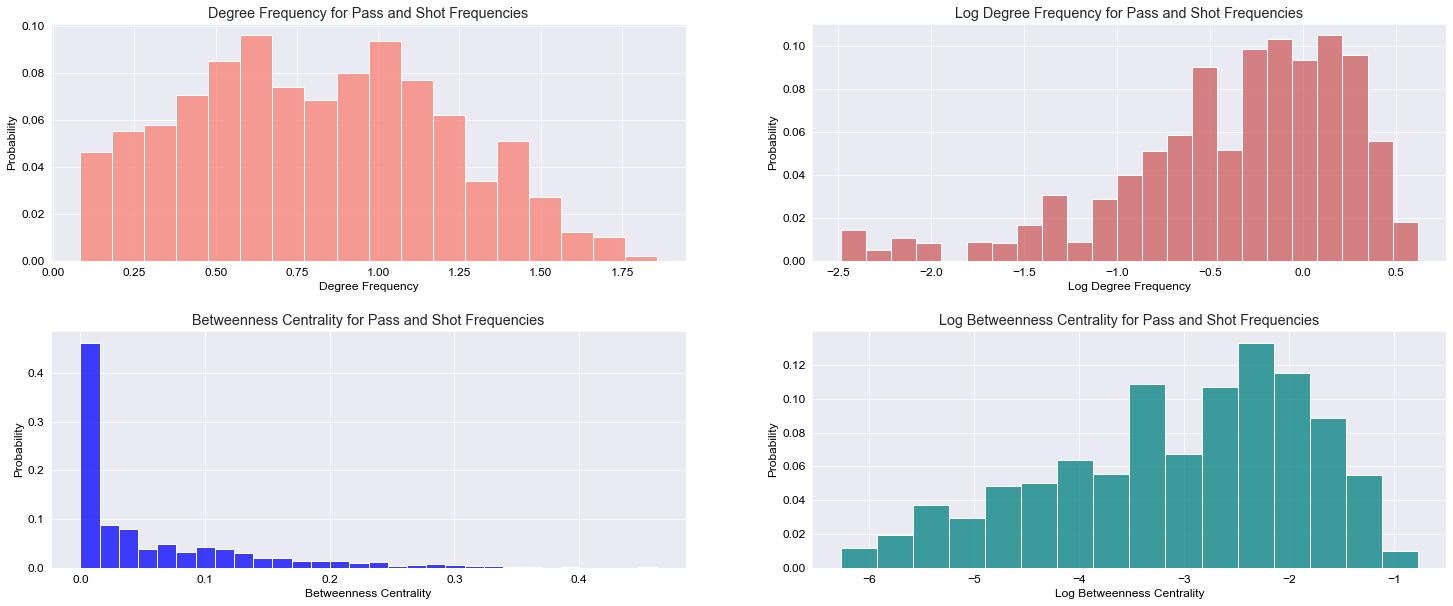

In [67]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 10))
plt.rcParams.update({'font.size': 12})


ax1 = sns.histplot(degree_frequencies, stat='probability', color='salmon', ax=ax1)
ax2 = sns.histplot(np.log(degree_frequencies), stat='probability', color="indianred", ax=ax2)
ax3 = sns.histplot(betweenness_centrality, stat='probability', color='blue', ax=ax3)
ax4 = sns.histplot(np.log(betweenness_centrality), stat='probability', color='teal', ax=ax4)

ax1.set(xlabel='Degree Frequency')
ax1.set_title('Degree Frequency for Pass and Shot Frequencies')
ax2.set(xlabel='Log Degree Frequency')
ax2.set_title('Log Degree Frequency for Pass and Shot Frequencies')
ax3.set(xlabel='Betweenness Centrality')
ax3.set_title('Betweenness Centrality for Pass and Shot Frequencies')
ax4.set(xlabel='Log Betweenness Centrality')
ax4.set_title('Log Betweenness Centrality for Pass and Shot Frequencies')
plt.subplots_adjust(hspace = 0.3)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

In [68]:
player_centrality_metrics = pd.concat(centrality_metrics.values()).groupby('index').sum()
player_game_metrics = players_playoffs.groupby('PLAYER_NAME_LAST_FIRST').sum(['REB_overall', 'AST_overall', 'STL_overall', 'BLK_overall', 'TO_overall', 'PF_overall', 'PTS_overall'])[['REB_overall', 'AST_overall', 'STL_overall', 'BLK_overall', 'TO_overall', 'PF_overall', 'PTS_overall']]
player_metrics = player_centrality_metrics.join(player_game_metrics, how='left')

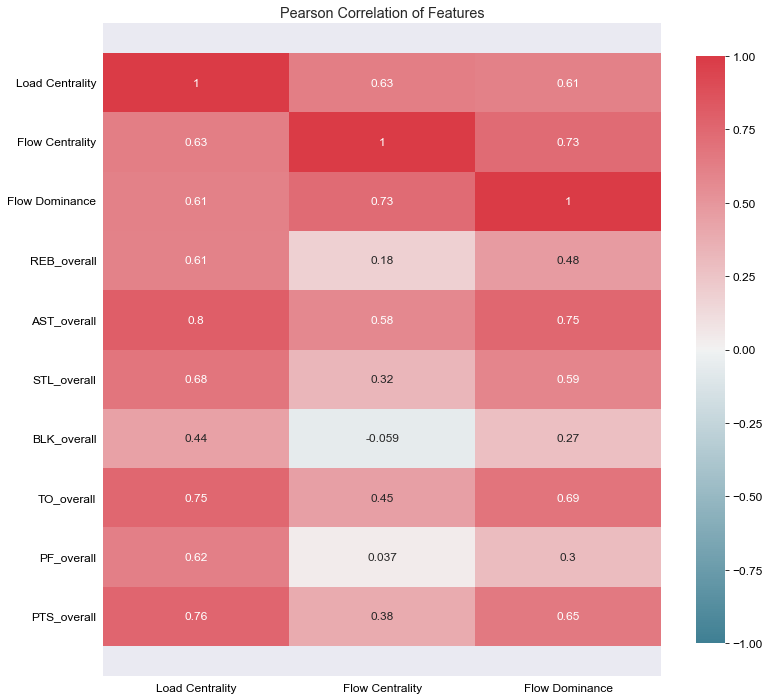

In [69]:
fig, ax = plt.subplots(figsize=(12.5,12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.rcParams.update({'font.size': 12})
ax = sns.heatmap(player_metrics[['Load Centrality', 'Flow Centrality', 'Flow Dominance', 'REB_overall', 'AST_overall', 'STL_overall', 'BLK_overall', 'TO_overall', 'PF_overall', 'PTS_overall']]
                 .corr()[['Load Centrality', 'Flow Centrality', 'Flow Dominance']], 
                 cmap=colormap, cbar_kws={'shrink':.9 }, annot=True, vmin=-1, vmax=1, linecolor='white', annot_kws={'fontsize':12 })
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set(title="Pearson Correlation of Features")
plt.show()

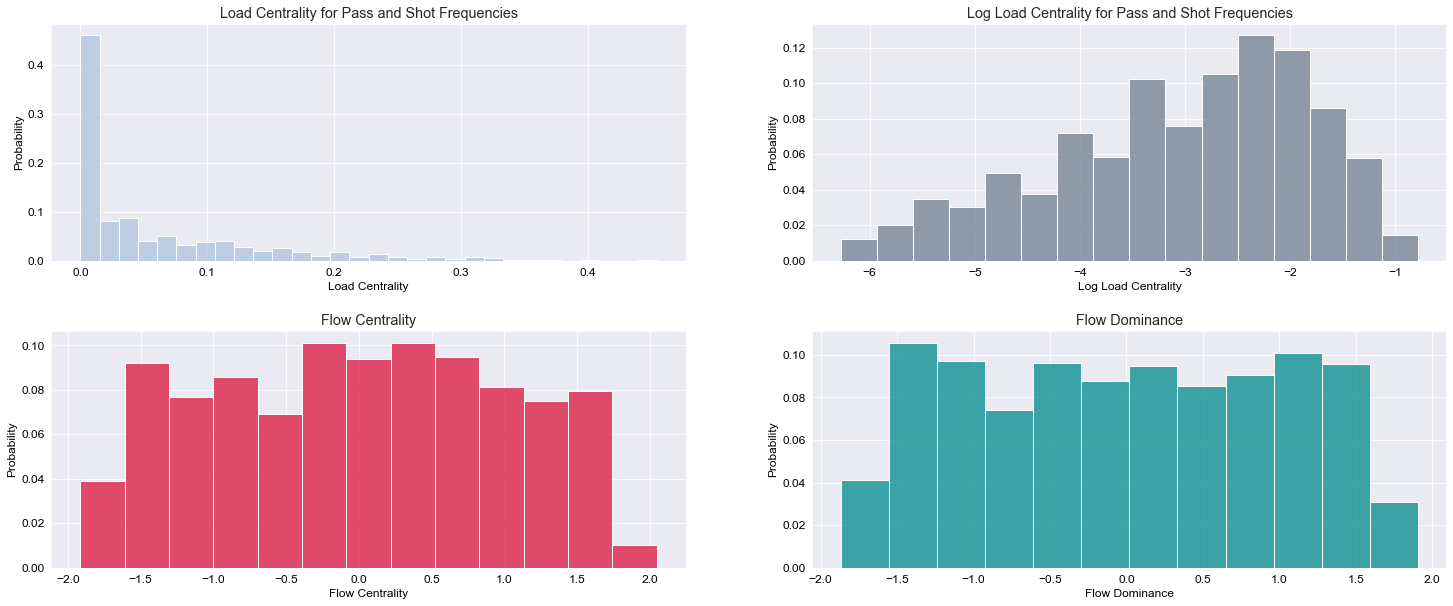

In [75]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 10))
plt.rcParams.update({'font.size': 12})

ax1 = sns.histplot(load_centrality, stat='probability', color='lightsteelblue', ax=ax1)
ax2 = sns.histplot(np.log(load_centrality), stat='probability', color='slategray', ax=ax2)
ax3 = sns.histplot(flow_centrality, stat='probability', color='crimson', ax=ax3)
ax4 = sns.histplot(flow_dominance, stat='probability', color="darkcyan", ax=ax4)

ax1.set(xlabel='Load Centrality')
ax1.set_title('Load Centrality for Pass and Shot Frequencies')
ax2.set(xlabel='Log Load Centrality')
ax2.set_title('Log Load Centrality for Pass and Shot Frequencies')
ax3.set(xlabel='Flow Centrality')
ax3.set_title('Flow Centrality')
ax4.set(xlabel='Flow Dominance')
ax4.set_title('Flow Dominance')
plt.subplots_adjust(hspace = 0.3)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

In [29]:
def CalculateTeamPerformance(performance_metric, number_of_players_to_average):
    
    flow_metric = {}
    for g in game_networks:
        g_players = players_playoffs[players_playoffs['GAME_ID']==g]

        team1 = g_players[~g_players['TEAM_NAME'].isna()]['TEAM_NAME'].unique()[0]
        team1_players = g_players[g_players['TEAM_NAME']==team1]['PLAYER_NAME_LAST_FIRST'].unique()
        team2 = g_players[~g_players['TEAM_NAME'].isna()]['TEAM_NAME'].unique()[1]
        team2_players = g_players[g_players['TEAM_NAME']==team2]['PLAYER_NAME_LAST_FIRST'].unique()

        g_metrics = game_networks[g]['Metrics'].dropna()
        team1_metrics = g_metrics[g_metrics.index.isin(team1_players)]
        team2_metrics = g_metrics[g_metrics.index.isin(team2_players)]

        team1_flow = np.sort(team1_metrics[performance_metric])[::-1]
        team1_flow_avg = np.mean(team1_flow[:number_of_players_to_average])
        team2_flow = np.sort(team2_metrics[performance_metric])[::-1]
        team2_flow_avg = np.mean(team2_flow[:number_of_players_to_average])

        flow_metric[g] = {team1: None, team2: None}
        flow_metric[g][team1] = team1_flow_avg
        flow_metric[g][team2] = team2_flow_avg

    flow_metric_df = pd.DataFrame.from_dict(flow_metric).stack().reset_index().rename(columns={'level_0': 'Team', 'level_1': 'Game', 0: 'Flow Metric Average'})

    season_playoffs_flow = season_playoffs.merge(flow_metric_df, how='left', left_on=['GAME_ID', 'HOME_TEAM'], right_on=['Game', 'Team']).rename(columns={'Flow Metric Average': f'Home Team Flow {performance_metric}'}).drop(columns=['Game', 'Team'])
    season_playoffs_flow = season_playoffs_flow.merge(flow_metric_df, how='left', left_on=['GAME_ID', 'AWAY_TEAM'], right_on=['Game', 'Team']).rename(columns={'Flow Metric Average': f'Away Team Flow {performance_metric}'}).drop(columns=['Game', 'Team'])

    season_playoffs_flow['HOME_TEAM_FLOW_WIN'] = np.where(season_playoffs_flow[f'Home Team Flow {performance_metric}']>season_playoffs_flow[f'Away Team Flow {performance_metric}'], 1, 0)

    return season_playoffs_flow
    
def PlotROCForFlowMetric(flow_df, performance_metric):
    
    FPR, TPR, _ = roc_curve(flow_df.HOME_TEAM_WINS, flow_df.HOME_TEAM_FLOW_WIN)
    auc_score = roc_auc_score(flow_df.HOME_TEAM_WINS, flow_df.HOME_TEAM_FLOW_WIN)
    
    fig, ax = plt.subplots(figsize=(25, 10))
    plt.rcParams.update({'font.size': 12})

    ax.plot(FPR, TPR, linestyle="-", color="r")
    ax.plot([0, 1], ls="--")

    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.set_title(f'ROC Curve for Match Performance ({performance_metric}) / AUC Score: {round(auc_score,2)}')

    custom_style = {'axes.labelcolor': 'black',
                    'xtick.color': 'black',
                    'ytick.color': 'black'}
    ax = sns.set_style("darkgrid", rc=custom_style)
    

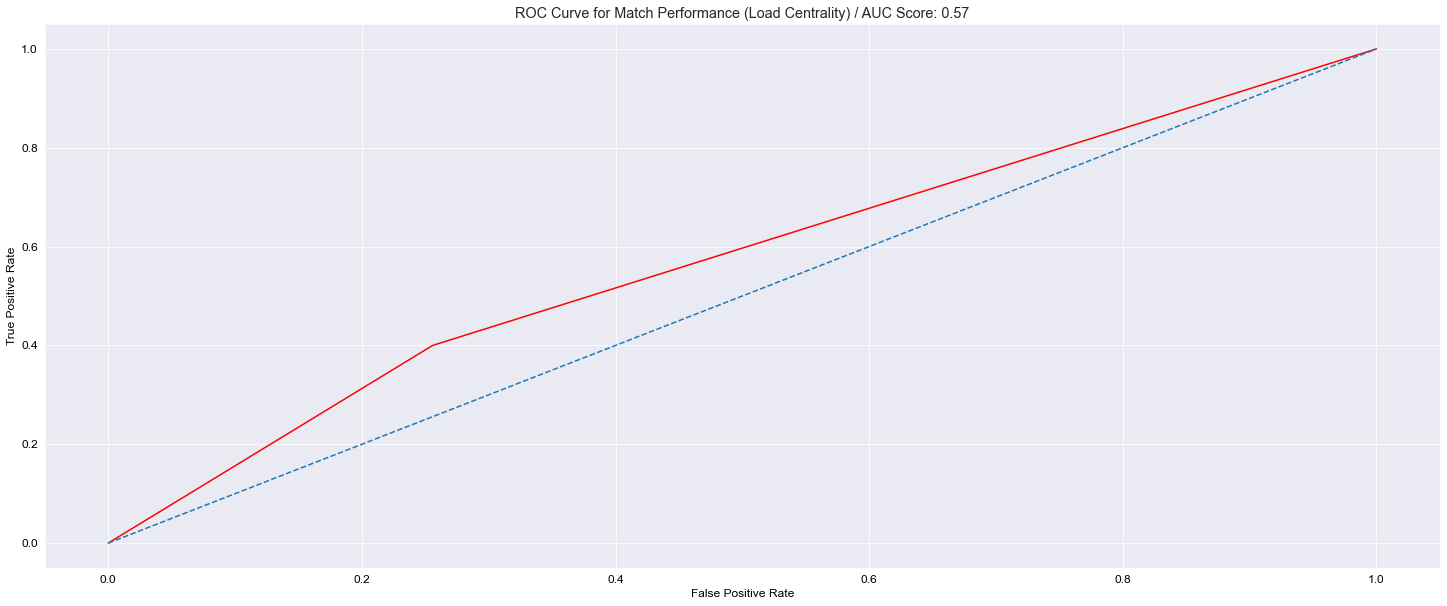

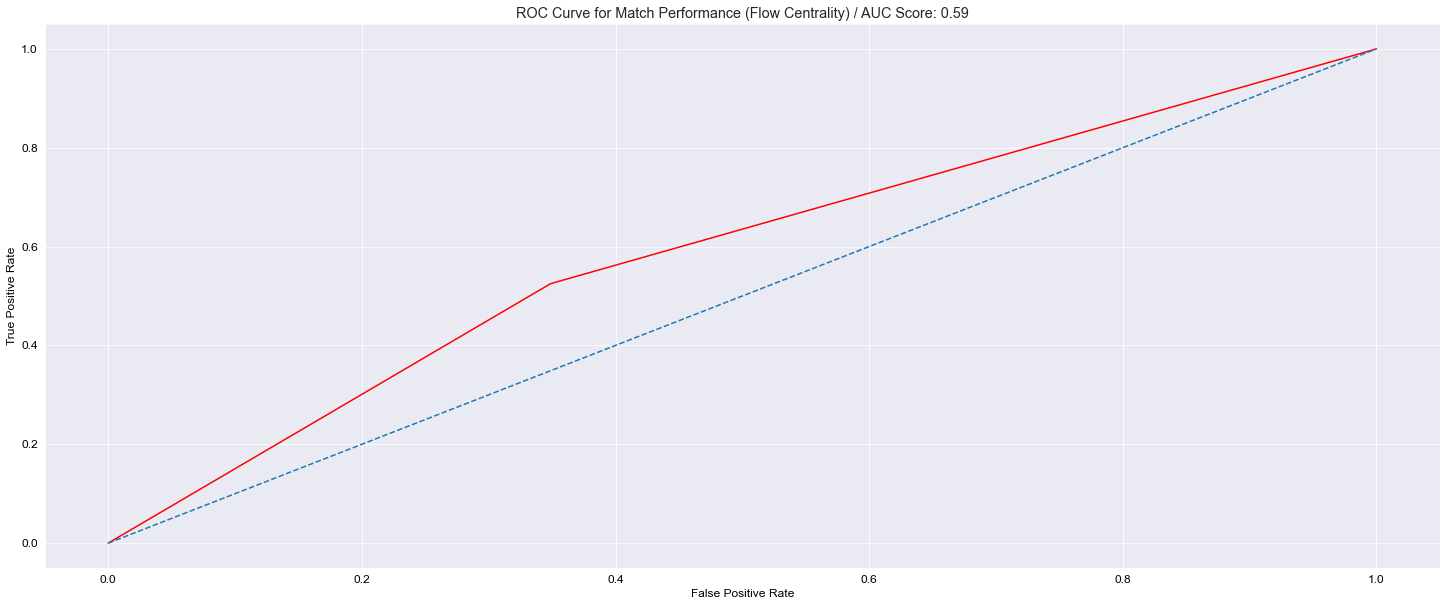

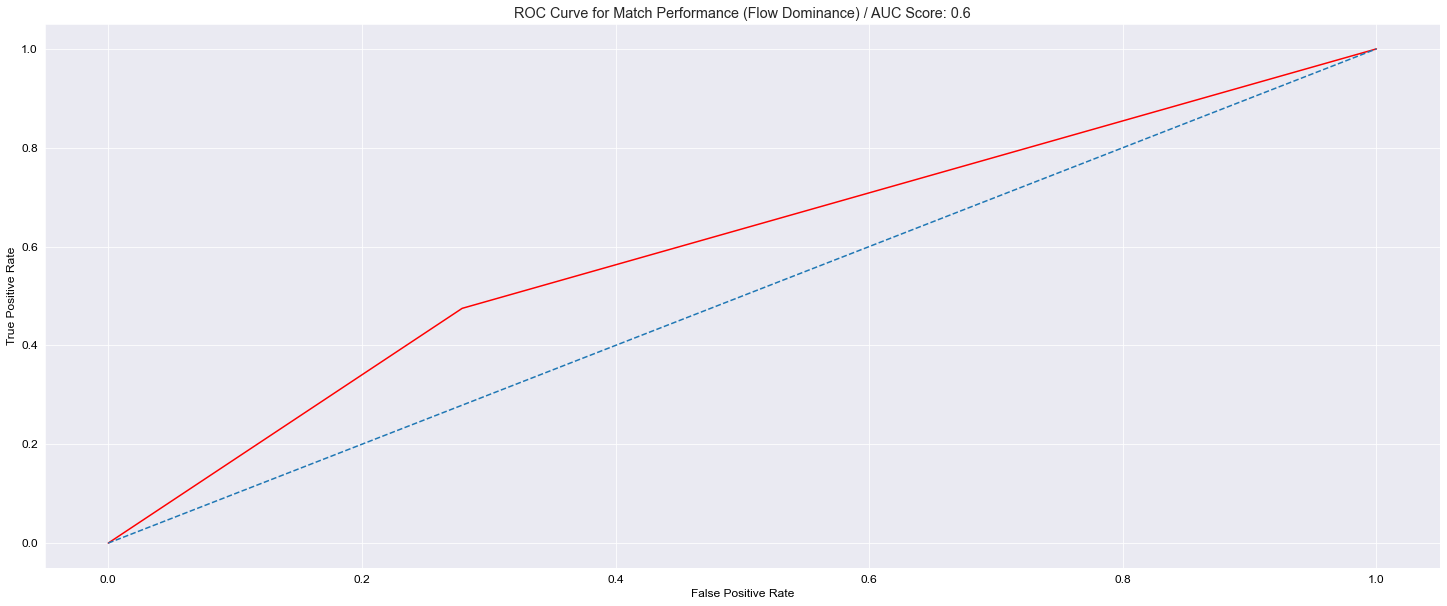

In [76]:
for metric in ['Load Centrality', 'Flow Centrality', 'Flow Dominance']:
    season_playoffs_flow = CalculateTeamPerformance(metric, 5)
    PlotROCForFlowMetric(season_playoffs_flow, metric)

In [141]:
season_playoffs_flow.head()

,HOME_TEAM,HOME_TEAM_ID,AWAY_TEAM,VISITOR_TEAM_ID,GAME_ID,GAME_DATE_EST,FGM_home,FGA_home,FG3M_home,FG3A_home,...,PF_away,PTS_away,FG_PCT_away,FG3_PCT_away,FT_PCT_away,HOME_TEAM_WINS,COLOR,Home Team Flow Flow Dominance,Away Team Flow Flow Dominance,HOME_TEAM_FLOW_WIN
0,Miami Heat,1610612748,Boston Celtics,1610612738,41900306,2020-09-27,45.0,80.0,13.0,27.0,...,21.0,113.0,0.302817,0.245902,0.444444,1,#029386,3.932359e-01,0.348194,1
1,Miami Heat,1610612748,Boston Celtics,1610612738,41900304,2020-09-23,39.0,91.0,10.0,37.0,...,24.0,109.0,0.322314,0.259259,0.447368,1,#029386,-4.884981e-16,0.649612,0
2,Miami Heat,1610612748,Boston Celtics,1610612738,41900303,2020-09-19,33.0,85.0,12.0,44.0,...,29.0,117.0,0.325397,0.257143,0.464286,0,#FF796C,3.861221e-01,0.323041,1
3,Philadelphia 76ers,1610612755,Boston Celtics,1610612738,41900124,2020-08-23,35.0,82.0,9.0,34.0,...,25.0,110.0,0.316667,0.255319,0.431373,0,#FF796C,3.180810e-01,0.651771,0
4,Philadelphia 76ers,1610612755,Boston Celtics,1610612738,41900123,2020-08-21,28.0,95.0,9.0,39.0,...,23.0,102.0,0.292683,0.205128,0.478261,0,#FF796C,3.729756e-01,0.655867,0


In [77]:
for metric in ['AST', 'BLK', 'STL', 'REB']:
    season_playoffs_flow[f'HOME_TEAM_{metric}_WIN'] = np.where(season_playoffs_flow[f'{metric}_home']>season_playoffs_flow[f'{metric}_away'], 1, 0)
    auc_score = roc_auc_score(season_playoffs_flow['HOME_TEAM_WINS'].values, season_playoffs_flow[f'HOME_TEAM_{metric}_WIN'].values)
    print(f"{metric} AUC: {auc_score}")

AST AUC: 0.7212209302325582
BLK AUC: 0.5863372093023256
STL AUC: 0.5523255813953488
REB AUC: 0.6854651162790697


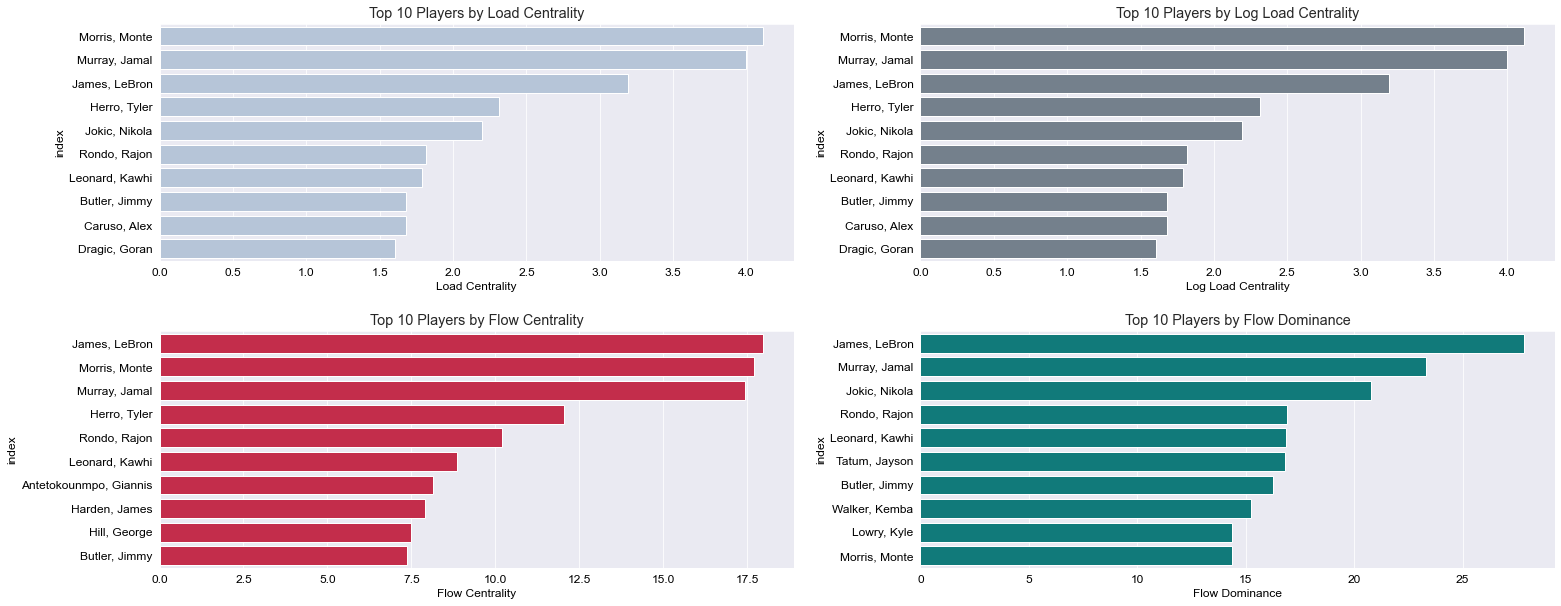

In [92]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 10))
plt.rcParams.update({'font.size': 12})

lc_players = player_centrality_metrics.sort_values(by='Load Centrality', ascending=False).head(10)
player_centrality_metrics['Log Load Centrality'] = np.log(player_centrality_metrics['Load Centrality'])
lclog_players = player_centrality_metrics.sort_values(by='Log Load Centrality', ascending=False).head(10)
fc_players = player_centrality_metrics.sort_values(by='Flow Centrality', ascending=False).head(10)
fd_players = player_centrality_metrics.sort_values(by='Flow Dominance', ascending=False).head(10)

ax1 = sns.barplot(x=lc_players['Load Centrality'], y=lc_players.index, color='lightsteelblue', ax=ax1)
ax2 = sns.barplot(x=lclog_players['Load Centrality'], y=lclog_players.index, color='slategray', ax=ax2)
ax3 = sns.barplot(x=fc_players['Flow Centrality'], y=fc_players.index, color='crimson', ax=ax3)
ax4 = sns.barplot(x=fd_players['Flow Dominance'], y=fd_players.index, color="darkcyan", ax=ax4)

ax1.set(xlabel='Load Centrality')
ax1.set_title('Top 10 Players by Load Centrality')
ax2.set(xlabel='Log Load Centrality')
ax2.set_title('Top 10 Players by Log Load Centrality')
ax3.set(xlabel='Flow Centrality')
ax3.set_title('Top 10 Players by Flow Centrality')
ax4.set(xlabel='Flow Dominance')
ax4.set_title('Top 10 Players by Flow Dominance')
plt.subplots_adjust(hspace = 0.3)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

In [93]:
season_playoffs = pd.read_csv('2019_Playoffs.csv')

In [94]:
season_playoffs.columns

Index(['HOME_TEAM', 'HOME_TEAM_ID', 'AWAY_TEAM', 'VISITOR_TEAM_ID', 'GAME_ID',
       'GAME_DATE_EST', 'FGM_home', 'FGA_home', 'FG3M_home', 'FG3A_home',
       'FTM_home', 'FTA_home', 'OREB_home', 'DREB_home', 'REB_home',
       'AST_home', 'STL_home', 'BLK_home', 'TO_home', 'PF_home', 'PTS_home',
       'FG_PCT_home', 'FG3_PCT_home', 'FT_PCT_home', 'FGM_away', 'FGA_away',
       'FG3M_away', 'FG3A_away', 'FTM_away', 'FTA_away', 'OREB_away',
       'DREB_away', 'REB_away', 'AST_away', 'STL_away', 'BLK_away', 'TO_away',
       'PF_away', 'PTS_away', 'FG_PCT_away', 'FG3_PCT_away', 'FT_PCT_away',
       'HOME_TEAM_WINS'],
      dtype='object')

In [95]:
season_playoffs.shape

(83, 43)

In [96]:
season_playoffs.isna().sum()[season_playoffs.isna().sum()>0]

Series([], dtype: int64)

In [97]:
season_playoffs.head()

,HOME_TEAM,HOME_TEAM_ID,AWAY_TEAM,VISITOR_TEAM_ID,GAME_ID,GAME_DATE_EST,FGM_home,FGA_home,FG3M_home,FG3A_home,...,AST_away,STL_away,BLK_away,TO_away,PF_away,PTS_away,FG_PCT_away,FG3_PCT_away,FT_PCT_away,HOME_TEAM_WINS
0,Miami Heat,1610612748,Boston Celtics,1610612738,41900306,2020-09-27,45.0,80.0,13.0,27.0,...,26.0,7.0,2.0,10.0,21.0,113.0,0.302817,0.245902,0.444444,1
1,Miami Heat,1610612748,Boston Celtics,1610612738,41900304,2020-09-23,39.0,91.0,10.0,37.0,...,28.0,3.0,5.0,19.0,24.0,109.0,0.322314,0.259259,0.447368,1
2,Miami Heat,1610612748,Boston Celtics,1610612738,41900303,2020-09-19,33.0,85.0,12.0,44.0,...,27.0,8.0,3.0,14.0,29.0,117.0,0.325397,0.257143,0.464286,0
3,Philadelphia 76ers,1610612755,Boston Celtics,1610612738,41900124,2020-08-23,35.0,82.0,9.0,34.0,...,19.0,4.0,5.0,14.0,25.0,110.0,0.316667,0.255319,0.431373,0
4,Philadelphia 76ers,1610612755,Boston Celtics,1610612738,41900123,2020-08-21,28.0,95.0,9.0,39.0,...,15.0,7.0,8.0,10.0,23.0,102.0,0.292683,0.205128,0.478261,0


In [98]:
season_playoffs['COLOR'] = np.where(season_playoffs['HOME_TEAM_WINS']==1, '#029386', '#FF796C')

home_game_wins = season_playoffs.groupby('HOME_TEAM')['HOME_TEAM_WINS'].sum().reset_index().rename(columns={'HOME_TEAM': 'TEAM', 'HOME_TEAM_WINS': 'GAMES_WON_AT_HOME'}).set_index('TEAM')
away_game_wins = season_playoffs[season_playoffs['HOME_TEAM_WINS']==0].groupby('AWAY_TEAM')['HOME_TEAM_WINS'].count().reset_index().rename(columns={'AWAY_TEAM': 'TEAM', 'HOME_TEAM_WINS': 'GAMES_WON_AT_AWAY'}).set_index('TEAM')
node_attributes_df = home_game_wins.join(away_game_wins, how='left')
node_attributes_df['WINS'] = node_attributes_df['GAMES_WON_AT_HOME']+node_attributes_df['GAMES_WON_AT_AWAY']
node_attributes_df = node_attributes_df.fillna(0)

node_attributes_df

,GAMES_WON_AT_HOME,GAMES_WON_AT_AWAY,WINS
TEAM,,,
Boston Celtics,3,7.0,10.0
Brooklyn Nets,0,0.0,0.0
Dallas Mavericks,1,1.0,2.0
Denver Nuggets,5,4.0,9.0
Houston Rockets,4,1.0,5.0
Indiana Pacers,0,0.0,0.0
Los Angeles Clippers,3,4.0,7.0
Los Angeles Lakers,9,7.0,16.0
Miami Heat,6,8.0,14.0


In [99]:
edge_attributes = ['HOME_TEAM_WINS', 'COLOR', 'FGM_home', 'FGA_home', 'FG3M_home', 'FG3A_home',
                   'FTM_home', 'FTA_home', 'OREB_home', 'DREB_home', 'REB_home', 
                   'AST_home', 'STL_home', 'BLK_home', 'TO_home', 'PF_home', 'PTS_home',
                   'FG_PCT_home', 'FG3_PCT_home', 'FT_PCT_home', 'FGM_away', 'FGA_away',
                   'FG3M_away', 'FG3A_away', 'FTM_away', 'FTA_away', 'OREB_away',
                   'DREB_away', 'REB_away', 'AST_away', 'STL_away', 'BLK_away', 'TO_away',
                   'PF_away', 'PTS_away', 'FG_PCT_away', 'FG3_PCT_away', 'FT_PCT_away']

G = nx.from_pandas_edgelist(season_playoffs, 'HOME_TEAM', 'AWAY_TEAM', edge_attributes)
node_attributes = node_attributes_df.to_dict('index')
nx.set_node_attributes(G, node_attributes)
d = dict(G.degree)
# d

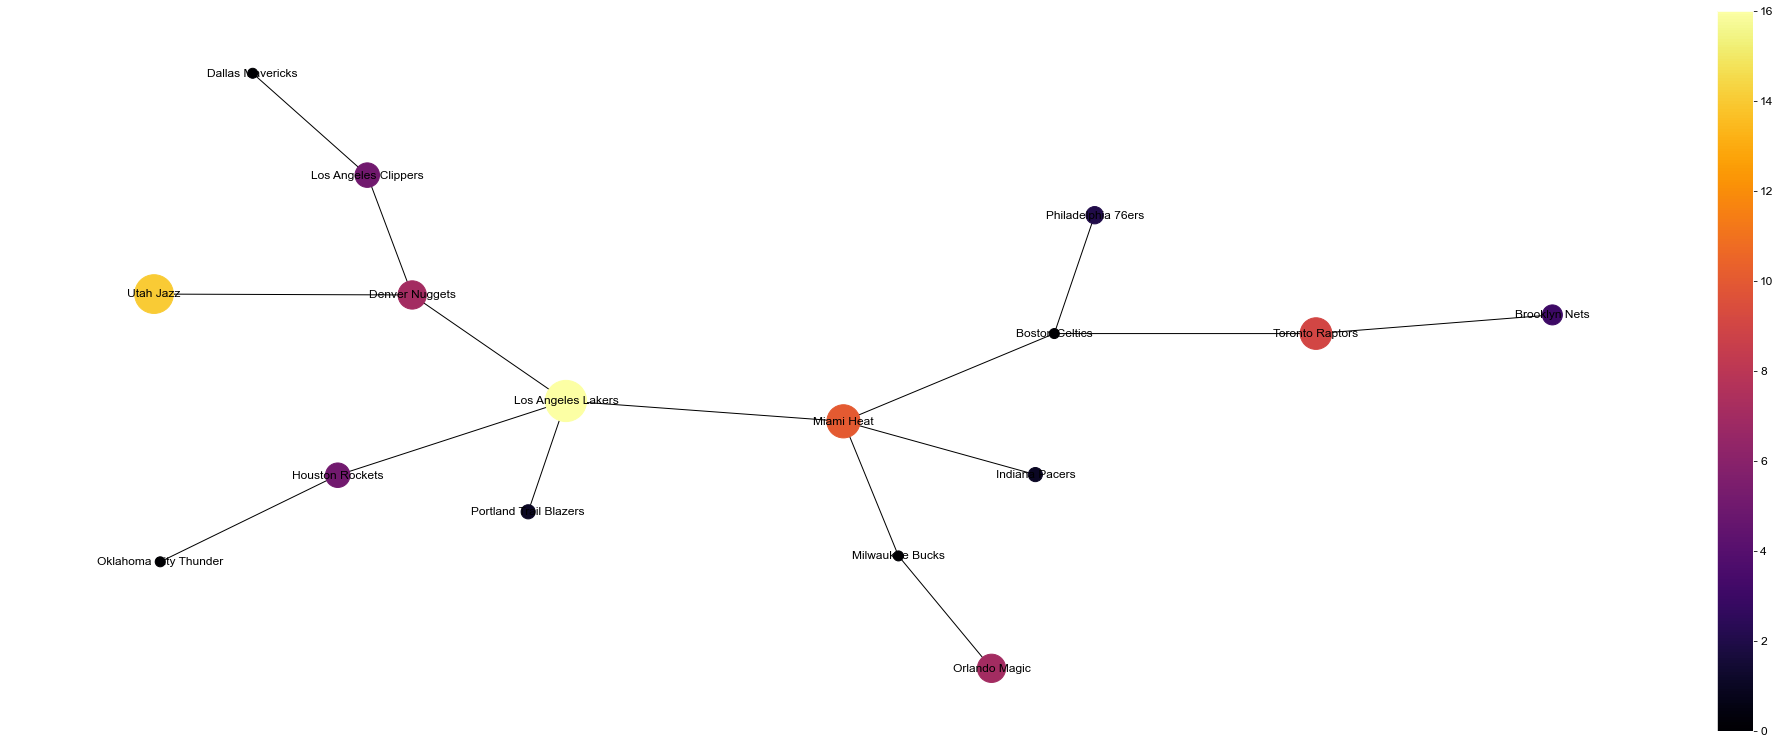

In [102]:
random.seed(0)

plt.figure(figsize = (25, 10))

low, *_, high = sorted([i['WINS'] for i in node_attributes.values()])
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.inferno)

pos = nx.kamada_kawai_layout(G)

nx.draw(G,
        pos=pos,
        nodelist=d,
        node_size=[(i['WINS']+1)*100 for i in node_attributes.values()],
        node_color=[mapper.to_rgba(i['WINS']) for i in node_attributes.values()],
        # edge_color=[G[u][v]['COLOR'] for u,v in G.edges()],
        with_labels = True)

mapper.set_array(sorted([i['WINS'] for i in node_attributes.values()]))
plt.colorbar(mapper, fraction=0.05, pad=0.01)
plt.show()

In [26]:
all_player_nodes_attributes_df = players_playoffs.groupby(['PLAYER_NAME_LAST_FIRST'])[player_nodes_columns].mean()
all_player_nodes_attributes_df = all_player_nodes_attributes_df.fillna(0).round(2)
all_player_node_attributes = all_player_nodes_attributes_df.to_dict('index')

all_players_network = nx.from_pandas_edgelist(players_playoffs, 'PLAYER_NAME_LAST_FIRST', 'PASS_TO', player_edges_attributes, create_using=nx.DiGraph())

for node in all_players_network.nodes():
    all_players_network.nodes[node]['Name'] = node
    if node in players_playoffs['PLAYER_NAME_LAST_FIRST'].unique():
        all_players_network.nodes[node]['PTS_overall'] = all_player_node_attributes[node]['PTS_overall']
        all_players_network.nodes[node]['OREB_overall'] = all_player_node_attributes[node]['OREB_overall']
        all_players_network.nodes[node]['DREB_overall'] = all_player_node_attributes[node]['DREB_overall']
        all_players_network.nodes[node]['REB_overall'] = all_player_node_attributes[node]['REB_overall']
        all_players_network.nodes[node]['AST_overall'] = all_player_node_attributes[node]['AST_overall']
        all_players_network.nodes[node]['STL_overall'] = all_player_node_attributes[node]['STL_overall']
        all_players_network.nodes[node]['BLK_overall'] = all_player_node_attributes[node]['BLK_overall']
        all_players_network.nodes[node]['TO_overall'] = all_player_node_attributes[node]['TO_overall']
        all_players_network.nodes[node]['PLUS_MINUS_overall'] = all_player_node_attributes[node]['PLUS_MINUS_overall']
    else:
        all_player_nodes_attributes_df2 = players_playoffs.groupby(['PASS_TO'])[player_nodes_columns].mean()
        all_player_nodes_attributes_df2 = all_player_nodes_attributes_df2.fillna(0).round(2)
        all_player_node_attributes2 = all_player_nodes_attributes_df2.to_dict('index')
        
        all_players_network.nodes[node]['PTS_overall'] = all_player_node_attributes2[node]['PTS_overall']
        all_players_network.nodes[node]['OREB_overall'] = all_player_node_attributes2[node]['OREB_overall']
        all_players_network.nodes[node]['DREB_overall'] = all_player_node_attributes2[node]['DREB_overall']
        all_players_network.nodes[node]['REB_overall'] = all_player_node_attributes2[node]['REB_overall']
        all_players_network.nodes[node]['AST_overall'] = all_player_node_attributes2[node]['AST_overall']
        all_players_network.nodes[node]['STL_overall'] = all_player_node_attributes2[node]['STL_overall']
        all_players_network.nodes[node]['BLK_overall'] = all_player_node_attributes2[node]['BLK_overall']
        all_players_network.nodes[node]['TO_overall'] = all_player_node_attributes2[node]['TO_overall']
        all_players_network.nodes[node]['PLUS_MINUS_overall'] = all_player_node_attributes2[node]['PLUS_MINUS_overall']
        
d = dict(all_players_network.degree)

In [27]:
pos = nx.kamada_kawai_layout(all_players_network)

e = nxa.draw_networkx_edges(all_players_network, pos=pos)  # get the edge layer
n = nxa.draw_networkx_nodes(all_players_network, pos=pos)  # get the node layer

In [28]:
n = n.mark_circle().encode(
        color=alt.Color('PTS_overall:Q', scale=alt.Scale(scheme='inferno')), 
        size=alt.Size('PTS_overall:Q',
                     scale=alt.Scale(range=[50,300])),
        tooltip=[alt.Tooltip('Name'), alt.Tooltip('PTS_overall'), alt.Tooltip('AST_overall'), alt.Tooltip('STL_overall'), alt.Tooltip('BLK_overall'), alt.Tooltip('TO_overall')]
        ).interactive()
e = e.mark_line().encode(
        color=alt.Color('norm_log_FREQUENCY'),
        stroke=alt.Stroke('norm_log_FREQUENCY')
        )

(e+n).properties(width=1500,height=800, title='NBA Players Playoffs Flow Network')

alt.LayerChart(...)